In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from GenderBiasUtils import GradCam,display_gradcam,get_img_array,get_nihcc_efficientnetb3,show_xray
from keras.applications.mobilenet_v2 import preprocess_input
from GenderBiasUtils import *
import albumentations as A
import cv2
import numpy as np

In [2]:
lpm_model=tf.keras.models.load_model('LPM/Models/RSNA_Pneumonia_75M_25F.h5')
lsm_model=get_lsm_model()

In [3]:
def apply_transform():
    img_file='crop.png'
    # Declare an augmentation pipeline
    transform = A.Compose([
           #A.CLAHE(clip_limit=8,p=1),
           #A.HorizontalFlip(p=0.2)
           #A.GridDistortion (num_steps=5, distort_limit=0.3, interpolation=1, border_mode=cv2.BORDER_CONSTANT, value=None, mask_value=None, always_apply=True, p=1)
           #A.RandomGamma (gamma_limit=(100, 120), eps=None, always_apply=True, p=1)
           A.CenterCrop (300, 300, always_apply=True, p=1.0)
           #A.RandomCrop (650, 650, always_apply=False, p=1.0)
         ])

    # Read an image with OpenCV and convert it to the RGB colorspace
    image = cv2.imread(img_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Augment an image
    transformed = transform(image=image)
    transformed_image = transformed["image"]
        
    new_file_name="crop.png"
        
    cv2.imwrite(new_file_name,transformed_image)

tf.Tensor([[0.77493674 0.22506322]], shape=(1, 2), dtype=float32)


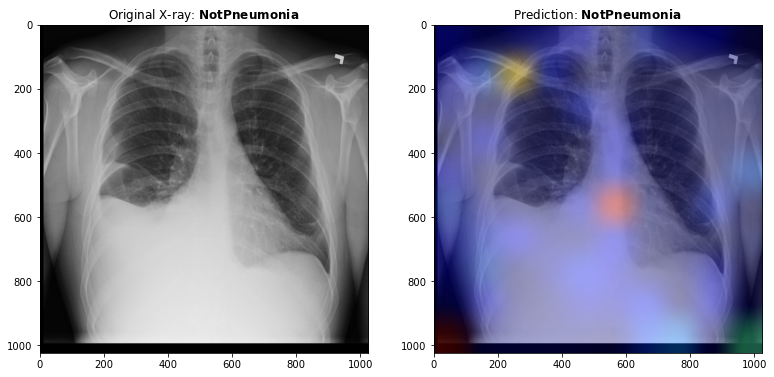

In [21]:
crop=False
transform=False
original_file="C:\\Chest X-rays\\Datasets\\RSNA_Pneumonia_0M_100F\\Test\\Not Pneumonia\\37b37037-486d-494d-948a-5d66d308dd45.png"
xray_file=original_file.replace("Test","Test")
if crop:
    separate_lungsv2(xray_file,'crop.png',lsm_model,'tight')
    if transform:
        apply_transform()
    xray_array = preprocess_input(get_img_array('crop.png', size=(300,300)))
    heatmap=GradCam(xray_array,lpm_model,last_conv_layer_name='top_activation',pred_index=1,display_pred=True)
    superimposed=display_gradcam('crop.png',heatmap,alpha=0.5)
else:
    image = cv2.imread(xray_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite('crop.png',image)
    if transform:
        apply_transform()
    xray_array = preprocess_input(get_img_array(xray_file, size=(300,300)))
    
    heatmap=GradCam(xray_array,lpm_model,last_conv_layer_name='top_activation',pred_index=1,display_pred=True)
    superimposed=display_gradcam(xray_file,heatmap,alpha=0.5)
    
if crop:
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    show_xray(original_file)
    plt.title("Original X-ray")
    plt.subplot(1,3,2)
    show_xray('crop.png')
    plt.title("Cropped X-ray")
    plt.subplot(1,3,3)
    plt.imshow(superimposed)
    plt.title("GradCam SuperImposed")
else:
    plt.figure(figsize=(20,20))
    plt.subplot(1,3,1)
    show_xray(original_file)
    plt.title("Original X-ray: "+ r"$\bf{Not Pneumonia"+ "}$");
    #plt.subplot(1,3,2)
    #show_xray('crop.png')
    #plt.title("Cropped X-ray")
    plt.subplot(1,3,2)
    plt.imshow(superimposed)
    plt.title("Prediction: "+ r"$\bf{Not Pneumonia"+ "}$");

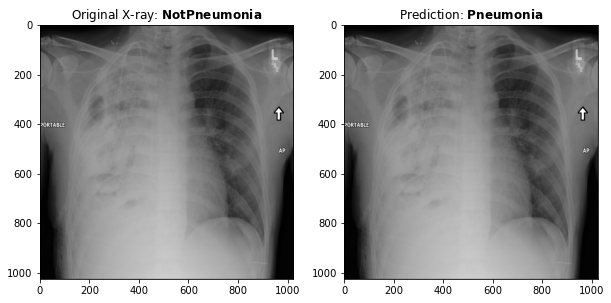

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
show_xray(xray_file)
plt.title("Original X-ray: "+ r"$\bf{Not Pneumonia"+ "}$");
plt.subplot(1,2,2)
show_xray(xray_file)
plt.title("Prediction: "+ r"$\bf{Pneumonia"+ "}$");